In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import pylab
import seaborn as sns

In [2]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# drop the columns not required and create new Data set
to_drop = ['BusinessTravel', 'DailyRate', 'DistanceFromHome','EmployeeCount',
          'EmployeeNumber', 'JobLevel', 'MonthlyIncome','MonthlyRate',
          'NumCompaniesWorked', 'Over18','PercentSalaryHike', 'PerformanceRating',
          'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
          'YearsInCurrentRole']
cdf = df.drop(to_drop, axis = 1)


cdf["MonthlyIncome"] = df["MonthlyIncome"]

cdf

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5,5993
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7,5130
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0,2090
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0,2909
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3,2571
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7,9991
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3,6142
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8,5390


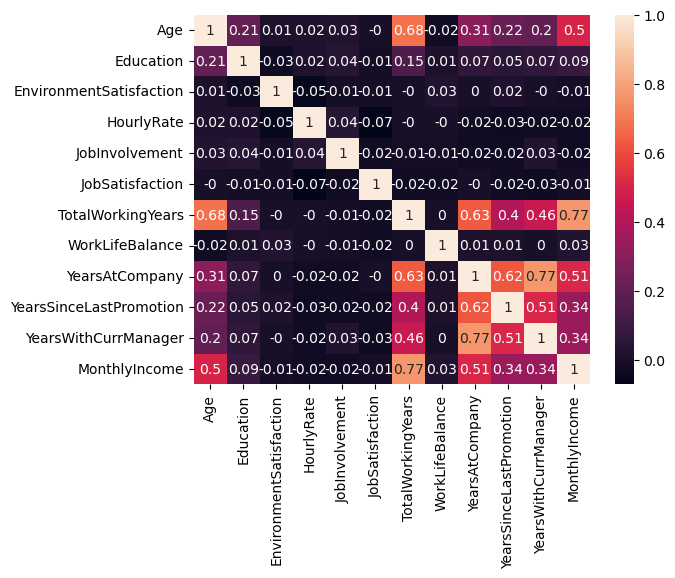

<Figure size 640x480 with 0 Axes>

In [4]:
#make heat map of attrition 
corr_grid = cdf.corr()

corr_grid = round(corr_grid,2)

heatmap_all = sns.heatmap(corr_grid, xticklabels = corr_grid.columns, yticklabels = corr_grid.columns, annot = True)


plt.show()
plt.clf()




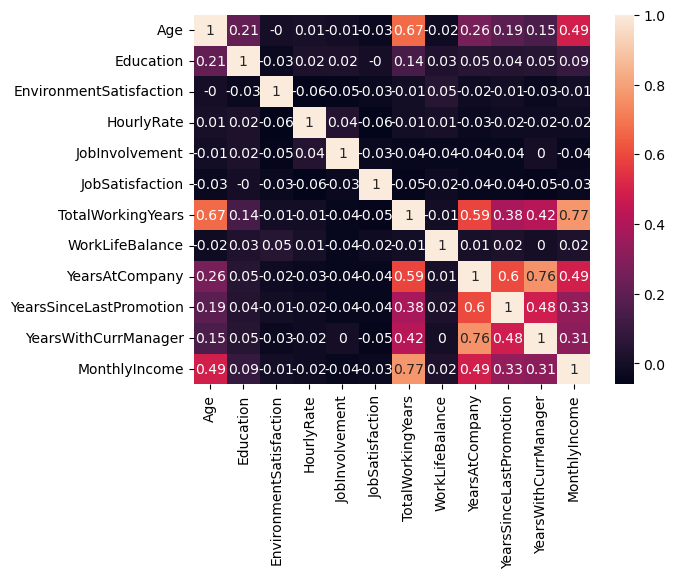

<Figure size 640x480 with 0 Axes>

In [5]:
#heatmap for all no's

cdf_no = cdf[cdf['Attrition'].str.contains('No')]

corr_grid_no = cdf_no.corr()
corr_grid_no = round(corr_grid_no,2)

sns.heatmap(corr_grid_no, xticklabels = corr_grid_no.columns, yticklabels = corr_grid_no.columns, annot = True)
plt.show()
plt.clf()

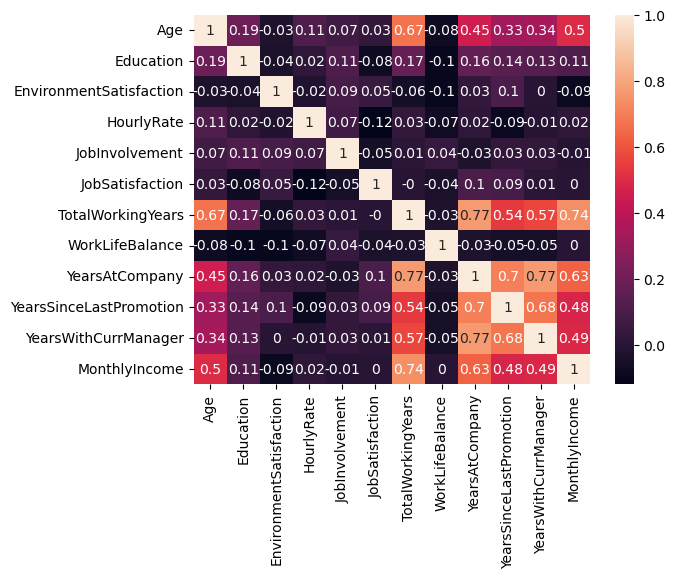

<Figure size 640x480 with 0 Axes>

In [6]:
#heatmap for all yes's


cdf_yes = cdf[cdf['Attrition'].str.contains('Yes')]

corr_grid_yes = cdf_yes.corr()
corr_grid_yes = round(corr_grid_yes,2)

sns.heatmap(corr_grid_yes, xticklabels = corr_grid_yes.columns, yticklabels = corr_grid_yes.columns, annot = True)
plt.show()
plt.clf()

<AxesSubplot:ylabel='count'>

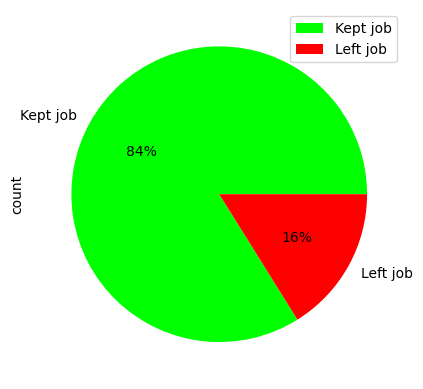

In [7]:
#total of all who have attrited

all_att = df.groupby('Attrition').Gender.count()


total_df = pd.DataFrame({"count": all_att})
total_df = total_df.reset_index()

#pie chart for total Attrition

labels = ["Kept job", "Left job"]





colors = ["lime","red"]

attrition_pie= total_df.plot(kind = 'pie', 
           y = "count", 
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)

attrition_pie

In [44]:
def pie_by_male():
    
    gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()
    gender_att = pd.DataFrame({"Count": gender1})
    gender_att.reset_index() 

    Male_attrition = gender_att.iloc[2:]
    Male_attrition = Male_attrition.reset_index()

    
    
    
    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(Male_attrition['Count'], labels= ['kept job', 'left job'], autopct='%.1f%%',
          wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    
    plt.setp(pcts, color='white', fontweight='bold')
    
    
    ax.set_title('Males by Attrition')
    plt.tight_layout()

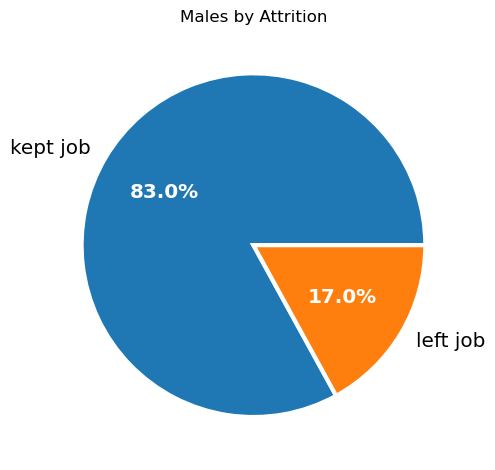

In [45]:
pie_by_male()

In [46]:
def pie_by_female():
    
    gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()
    gender_att = pd.DataFrame({"Count": gender1})
    gender_att.reset_index()
    
    Female_attrition = gender_att.iloc[:2]
    Female_attrition = Female_attrition.reset_index()
    
    
    
    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(Female_attrition['Count'], 
                                  labels=['kept job', 'left job'],
                                  autopct='%.1f%%',
                                  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    ax.set_title('Female by attrition')
    
    plt.setp(pcts, color='white', fontweight='bold')
    plt.tight_layout()
    

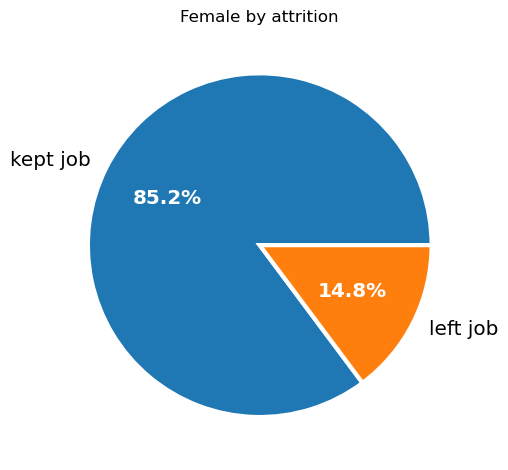

In [47]:
pie_by_female()

In [8]:
#count number of people in each JobRole

dep_df = df.groupby(["JobRole","Attrition"]).Attrition.count()
dep_df = pd.DataFrame({'Count':dep_df})

dep_df = dep_df.reset_index()


dep_df

,JobRole,Attrition,Count
0,Healthcare Representative,No,122
1,Healthcare Representative,Yes,9
2,Human Resources,No,40
3,Human Resources,Yes,12
4,Laboratory Technician,No,197
5,Laboratory Technician,Yes,62
6,Manager,No,97
7,Manager,Yes,5
8,Manufacturing Director,No,135
9,Manufacturing Director,Yes,10


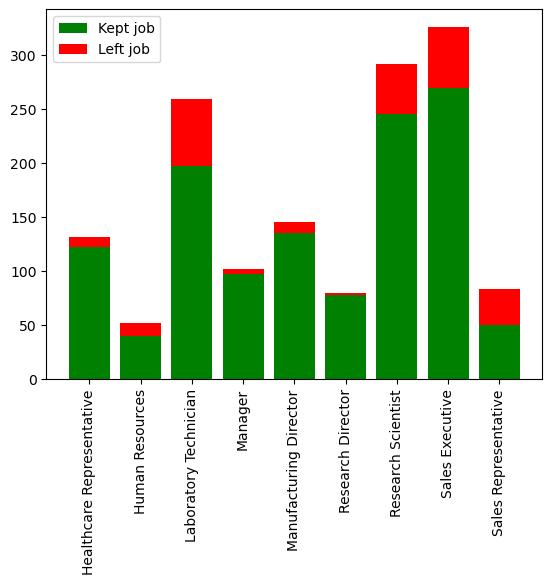

In [9]:
#take out JobRole portion and make it into a list
x_job = dep_df["JobRole"]
x_job = x_job.drop_duplicates()
x_job = x_job.tolist()



#take out the counts for "No" values and make it into a list

y_no =dep_df[dep_df['Attrition'].str.contains('No')]
y_no = y_no["Count"]


y_no = y_no.tolist()


#take out the counts for "Yes" values and make it into a list

y_yes =dep_df[dep_df['Attrition'].str.contains('Yes')]
y_yes = y_yes["Count"]

y_yes = y_yes.tolist()


#make a stacked bar graph, with no values on bottom, and yes values on top

plt.bar(x_job, y_no, color='green')
plt.bar(x_job, y_yes, bottom=y_no, color='red',)
plt.xticks(rotation = 'vertical')

labels = ["Kept job", "Left job"]
plt.legend(labels)

plt.show()

In [10]:
#Count by  Marital Status 

mar_df = cdf.groupby(["MaritalStatus", "Attrition"]).Attrition.count()

mar_df = pd.DataFrame({"Count": mar_df})

mar_df = mar_df.reset_index()

mar_df

,MaritalStatus,Attrition,Count
0,Divorced,No,294
1,Divorced,Yes,33
2,Married,No,589
3,Married,Yes,84
4,Single,No,350
5,Single,Yes,120


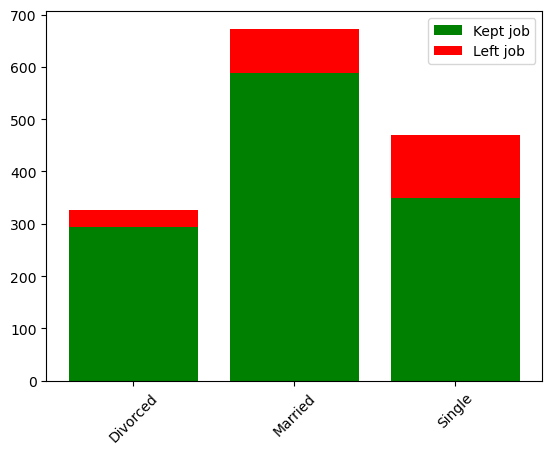

In [11]:
#make Marital Status into a list

mar_list = mar_df["MaritalStatus"]



mar_list = mar_list.drop_duplicates()
mar_list = mar_list.tolist()
mar_list  



#make count of No Attrition into a list

mar_no = mar_df[mar_df['Attrition'].str.contains('No')]
mar_no = mar_no['Count']
mar_no = mar_no.tolist()
mar_no




#make count of Yes Attrition into a list

mar_yes = mar_df[mar_df['Attrition'].str.contains('Yes')]
mar_yes = mar_yes['Count']
mar_yes = mar_yes.tolist()
mar_yes


#stacked bar graph based on marital status and attrition rate

plt.bar(mar_list, mar_no, color='green')
plt.bar(mar_list, mar_yes, bottom=mar_no, color='red',)
plt.xticks(rotation = 45)


labels = ["Kept job", "Left job"]
plt.legend(labels)

plt.show()


In [12]:
#make bins of ages and then use pd.cut to add to data frame



age_bins = [0, 30, 40, 50, 60]

labels = ["<30", "31 - 40", "41 - 49", "51-60"]



cdf["Age_groups"] = pd.cut(cdf["Age"], bins = age_bins, labels = labels)
cdf

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,Age_groups
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5,5993,41 - 49
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7,5130,41 - 49
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0,2090,31 - 40
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0,2909,31 - 40
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2,3468,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3,2571,31 - 40
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7,9991,31 - 40
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3,6142,<30
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8,5390,41 - 49


In [13]:
#counts of those in each age group 

age_df = cdf.groupby(["Age_groups","Attrition"]).Attrition.count()
age_df = pd.DataFrame({"Count": age_df})
age_df = age_df.reset_index()

age_df


,Age_groups,Attrition,Count
0,<30,No,286
1,<30,Yes,100
2,31 - 40,No,534
3,31 - 40,Yes,85
4,41 - 49,No,288
5,41 - 49,Yes,34
6,51-60,No,125
7,51-60,Yes,18


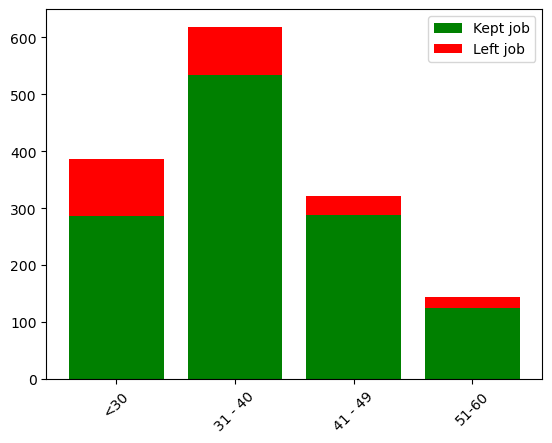

In [14]:
#make unique age_groups into a list

age_list = age_df["Age_groups"]
age_list = age_list.drop_duplicates()
age_list = age_list.tolist()
age_list

#make count of No Attrition into a list

age_no = age_df[age_df['Attrition'].str.contains('No')]
age_no = age_no['Count']
age_no = age_no.tolist()
age_no

#make count of Yes Attrition into a list

age_yes = age_df[age_df['Attrition'].str.contains('Yes')]
age_yes = age_yes['Count']
age_yes = age_yes.tolist()
age_yes


#stacked bar graph based on marital status and attrition rate

plt.bar(age_list, age_no, color='green')
plt.bar(age_list, age_yes, bottom=age_no, color='red',)
plt.xticks(rotation = 45)


labels = ["Kept job", "Left job"]
plt.legend(labels)

plt.show()

In [50]:
job_means = cdf.groupby("Attrition" ).mean()
#job_means = job_means.reset_index()
job_means

,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
Attrition,,,,,,,,,,,,
No,37.561233,2.927007,2.771290,65.952149,2.770479,2.778589,11.862936,2.781022,7.369019,2.234388,4.367397,6832.739659
Yes,33.607595,2.839662,2.464135,65.573840,2.518987,2.468354,8.244726,2.658228,5.130802,1.945148,2.852321,4787.092827


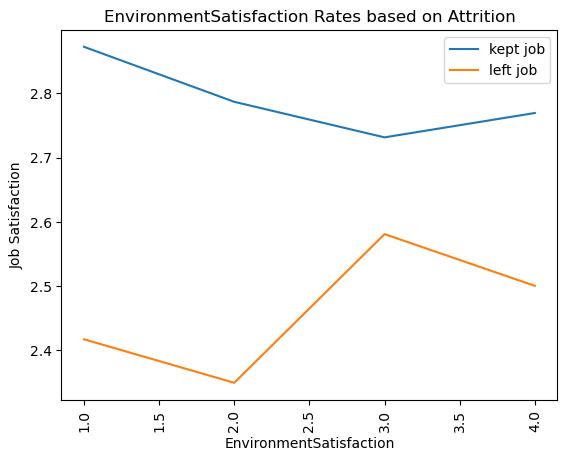

In [56]:
#line plot time to showcase the difference between yes and no 

job_means = cdf.groupby(["Attrition","EnvironmentSatisfaction"] ).mean()
job_means = job_means.reset_index()
job_means

#get list of Job Roles for the x values

job_list = job_means["EnvironmentSatisfaction"]
job_list = job_list.drop_duplicates()
job_list = job_list.tolist()
job_list

#get those that didnt leave their job and put into a list

job_no = job_means[job_means['Attrition'].str.contains('No')]
job_no = job_no["JobSatisfaction"]
job_no = job_no.tolist()
job_no

#get those that didnt leave their job and put into a list

job_yes = job_means[job_means['Attrition'].str.contains('Yes')]
job_yes = job_yes["JobSatisfaction"]
job_yes = job_yes.tolist()
job_yes



#plots time

plt.plot(job_list, job_no, label = "kept job")
plt.plot(job_list, job_yes, label = 'left job')
plt.title("EnvironmentSatisfaction Rates based on Attrition")
plt.xlabel("EnvironmentSatisfaction")
plt.ylabel("Job Satisfaction")
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

In [57]:
def attrition_count_bargraph(num):
    
    num = cat[num]
    
    Count =  df.groupby([num,"Attrition"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    
    att_list = Count[num]
    att_list = att_list.drop_duplicates()
    att_list = att_list.tolist()
    



    att_no = Count[Count["Attrition"].str.contains('No')]
    att_no = att_no['Count']
    att_no = att_no.tolist()
    



    att_yes = Count[Count["Attrition"].str.contains('Yes')]
    att_yes = att_yes['Count']
    att_yes = att_yes.tolist()
    
    
    
    plt.bar(att_list, att_no, color='green')
    plt.bar(att_list, att_yes, bottom= att_no, color='red',)
    plt.xticks(rotation = 'vertical')

    labels = ["Kept job", "Left job"]
    plt.legend(labels)

    plt.show()


In [58]:
attrition_count_bargraph(1)

NameError: name 'cat' is not defined

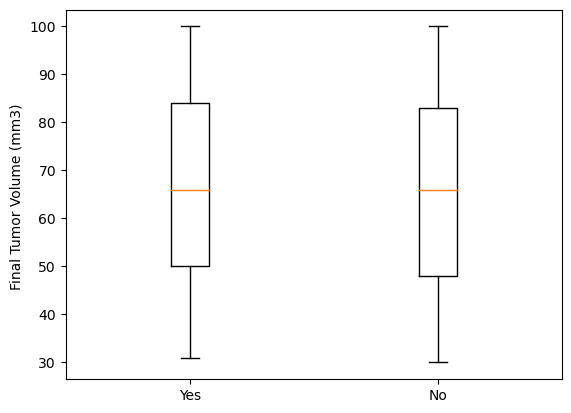

In [17]:
#boxplots for yes vs no for Hourly Rate based on Jobs

job_status = ['Yes', 'No']

hourly = []

for i in job_status:
    hourlywage = cdf.loc[cdf["Attrition"] == i, "HourlyRate"]
    
    hourly.append(hourlywage)

#calculate quantiles

fig1, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3) ")

ax.boxplot(hourly, labels = job_status)
plt.show()


In [18]:
age_mean = cdf.groupby(["Age_groups"]).mean()

In [19]:
pop1 = df[df["Attrition"] == "Yes"]
pop2 = df[df["Attrition"] == "No"]

st.ttest_ind(pop1.Age, pop2.Age)

Ttest_indResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10)

In [20]:
st.ttest_ind(pop1.Education, pop2.Education)

Ttest_indResult(statistic=-1.2026255155085892, pvalue=0.22931520332230415)

In [21]:
st.ttest_ind(pop1.EnvironmentSatisfaction, pop2.EnvironmentSatisfaction)

Ttest_indResult(statistic=-3.9818600026818496, pvalue=7.17233854936886e-05)

In [22]:
st.ttest_ind(pop1.HourlyRate, pop2.HourlyRate)

Ttest_indResult(statistic=-0.26228987349264493, pvalue=0.7931347689944243)

In [23]:
st.ttest_ind(pop1.JobInvolvement, pop2.JobInvolvement)

Ttest_indResult(statistic=-5.024140228583729, pvalue=5.677065356745289e-07)

In [24]:
st.ttest_ind(pop1.JobSatisfaction, pop2.JobSatisfaction)

Ttest_indResult(statistic=-3.9862267630568273, pvalue=7.04306674173115e-05)

In [25]:
st.ttest_ind(pop1.TotalWorkingYears, pop2.TotalWorkingYears)

Ttest_indResult(statistic=-6.6522546135024445, pvalue=4.0618781112668525e-11)

In [26]:
st.ttest_ind(pop1.WorkLifeBalance, pop2.WorkLifeBalance)

Ttest_indResult(statistic=-2.4548148934297767, pvalue=0.014211054989021308)

In [27]:
st.ttest_ind(pop1.YearsAtCompany, pop2.YearsAtCompany)

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

In [28]:
st.ttest_ind(pop1.YearsSinceLastPromotion, pop2.YearsSinceLastPromotion)

Ttest_indResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936)

In [29]:
st.ttest_ind(pop1.YearsWithCurrManager, pop2.YearsWithCurrManager)

Ttest_indResult(statistic=-6.059068531868998, pvalue=1.7369867845242207e-09)

In [30]:
# YearswithCurrManager, yearsatCompany, WorkLifeBalance, TotalWorkingYears,JobInvolvement, Age, 

#all these columns are statistically significant 

In [31]:
#count number of males and females

gender_df= df.groupby('Gender').Attrition.count()
gender_df = gender_df.reset_index()
gender_df

,Gender,Attrition
0,Female,588
1,Male,882


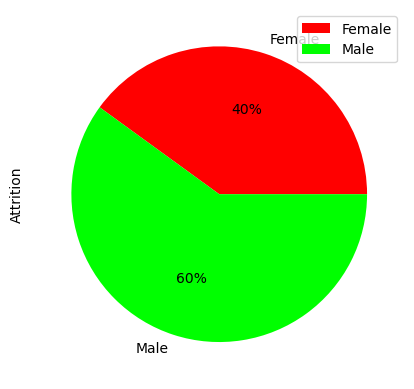

In [32]:

# make pie-chart

labels = gender_df['Gender']

colors = ["red", "lime"]

gender_pie= gender_df.plot(kind = 'pie', 
           y = "Attrition", 
                           
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)
    


In [33]:
#count for males,females, based on Attrition


gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()

gender_att = pd.DataFrame({"Count": gender1})

gender_att.reset_index()

,Gender,Attrition,Count
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


In [34]:
#split male and females into separate dataFrames

Female_attrition = gender_att.iloc[:2]
Female_attrition = Female_attrition.reset_index()

Female_attrition

Male_attrition = gender_att.iloc[2:]
Male_attrition = Male_attrition.reset_index()

Male_attrition

,Gender,Attrition,Count
0,Male,No,732
1,Male,Yes,150


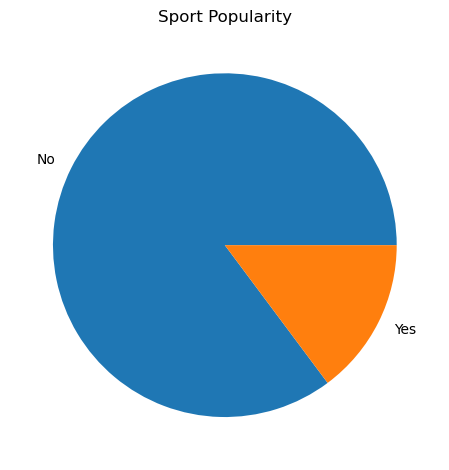

In [35]:
#make pie chart for Female attrition rates

fig, ax = plt.subplots()
ax.pie(Female_attrition['Count'], labels=Female_attrition["Attrition"])
ax.set_title('Sport Popularity')
plt.tight_layout()

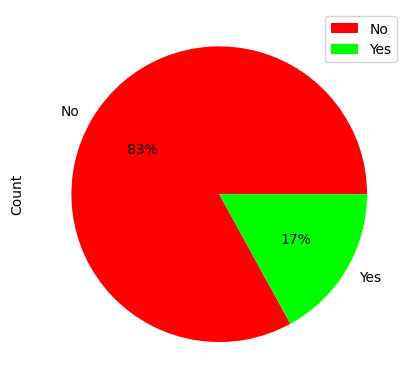

In [36]:
#make pie chart for Female attrition rates
labels = Male_attrition["Attrition"]
gender_pie= Male_attrition.plot(kind = 'pie', 
           y = "Count", 
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)

In [37]:
#this point on is attrition based on career 



edu_att = df.groupby(['Attrition','EducationField']).Attrition.count()


edu_att = pd.DataFrame({"Count": edu_att})

edu_att = edu_att.reset_index()

edu_att

,Attrition,EducationField,Count
0,No,Human Resources,20
1,No,Life Sciences,517
2,No,Marketing,124
3,No,Medical,401
4,No,Other,71
5,No,Technical Degree,100
6,Yes,Human Resources,7
7,Yes,Life Sciences,89
8,Yes,Marketing,35
9,Yes,Medical,63


In [38]:
#iloc to seperate no's and yes's

edu_no = edu_att.iloc[:6]
edu_yes = edu_att.iloc[6:]


edu_no

,Attrition,EducationField,Count
0,No,Human Resources,20
1,No,Life Sciences,517
2,No,Marketing,124
3,No,Medical,401
4,No,Other,71
5,No,Technical Degree,100


In [39]:
cdf

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,Age_groups
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5,5993,41 - 49
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7,5130,41 - 49
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0,2090,31 - 40
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0,2909,31 - 40
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2,3468,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3,2571,31 - 40
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7,9991,31 - 40
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3,6142,<30
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8,5390,41 - 49


In [40]:
dep_df = cdf.groupby(['Attrition','YearsWithCurrManager']).Attrition.count()
dep_df = pd.DataFrame({'count':dep_df})
dep_df = dep_df.reset_index()
dep_df

,Attrition,YearsWithCurrManager,count
0,No,0,178
1,No,1,65
2,No,2,294
3,No,3,123
4,No,4,87
5,No,5,27
6,No,6,25
7,No,7,185
8,No,8,97
9,No,9,58


In [41]:
#seperate out rows for yes and no 

dep_no = dep_df.iloc[:18]
dep_yes = dep_df.iloc[18:]


dep_yes.reset_index()
dep_yes



,Attrition,YearsWithCurrManager,count
18,Yes,0,85
19,Yes,1,11
20,Yes,2,50
21,Yes,3,19
22,Yes,4,11
23,Yes,5,4
24,Yes,6,4
25,Yes,7,31
26,Yes,8,10
27,Yes,9,6
